# **AP155 Lab Assignment** 
## Module 6: Partial Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 and 2 are worth 50 points each).

_Due Date_: **5PM of December 21 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: Salinas, Jose Enrico \
_Student No._: 201808184\
_Section_: THX2

In [1]:
# !pip install pytz
from datetime import datetime
from pytz import timezone
print("Last run: ", datetime.now(timezone("Asia/Manila")).strftime("%m/%d/%Y, %H:%M:%S"))

Last run:  12/09/2022, 17:18:25


### Submission Information

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** SALINAS, Jose Enrico

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

In [2]:
import numpy as np
from scipy import linalg as la
from scipy import fftpack as fft

import matplotlib.pyplot as plt
from matplotlib import animation
from IPython import display

### PROBLEM 1 (50 pts.; 50/50 for code & discussion) 
**The Schrodinger equation and the Crank-Nicolson method**

_Refer to Exercise 9.8 in the Newman text._ In this problem, you will use the Crank-Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time.

Consider an electron (mass $M = 9.109 \times 10^{-31}$ kg) in a box of length $L = 10^{-8}$ m. Suppose that at time $t = 0$ the wavefunction of the electron has the form

$$ \psi(x,0) = \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right]e^{i\kappa x},$$
where $x_0 = \frac{L}{2}$, $\sigma = 1 \times 10^{-10}$ m, $\kappa = 5 \times 10^{10} {\rm m}^{-1}$,  and $\psi = 0$ on the walls at $x = 0$ and $x = L$.

1. Perform a single step of the Crank-Nicolson method for this electron, calculating the vector $\psi(t)$ of values of the wavefunction, given the initial wavefunction above and using $N = 1000$ spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $\psi(0)$ at $t = 0$, you will have to multiply by the matrix $\bf{B}$ to get a vector $\bf{v} = \bf{B}\psi$. Because of the tridiagonal form of $\bf{B}$, this is fairly simple. The $i$th component of $\bf{v}$ is given by
$$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$

   You will also have to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-18}$ s. *(15 pts.)*

2. Second you will have to solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$, which gives you the new value of $\psi$. You could do this using a standard linear equation solver like the function $\tt solve$ in numpy's $\tt linalg$. *(10 pts.)*

3. Once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $\bf A$ is independent of time, so it doesn't change from one step to another. You can set up the matrix just once and then keep on reusing it for every step. *(15 pts.)*

4. Make an animation of the solution by displaying the real part of the wavefunction at each time-step. You can use the function rate from the package visual to ensure a smooth frame-rate for your animation-- see Section 3.5 on page 117 of the Newman text. 

   Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(10 pts.)*

---

We can estimate the time evolution of a wave function using the Crank-Nicolson method as follows. First, we define the initial wave function `t=0` and any physical constants we need.

In [3]:
m_e = 9.109e-31
hbar = 1.0546e-34

l = 1e-8
sigma = 10e-10
kappa = 5e10
x_0 = l/2

In [4]:
def psi_initial(x):
    return np.exp(-(x-x_0)**2/(2*sigma**2))*np.exp(1.0j*kappa*x)

Then, we divide the box into 1000 slices or 1001 evenly spaced points. For each point, we calculate the initial wave function using the function defined above. For a physical solution, we require that the wave function vanishes at the boundaries, so we set the endpoints to be 0. We also define the time step `h=10e-18` in seconds.

In [5]:
n = 1000
a = l/n
h = 1e-18

x_points = np.linspace(0, l, n+1)
psi_points = psi_initial(x_points)
psi_points[0], psi_points[-1] = 0.0j, 0.0j

Next, we define the matrices A and B which are related as
$$ \begin{equation} A\psi(t+h)=B\psi(t)\end{equation} $$

A and B are tridiagonal matrices where A is defined as
$$A=\begin{equation}\begin{bmatrix}a_1&a_2&0&0&\cdots\\
a_2&a_1&a_2&0&\cdots\\
0&a_2&a_1&a_2&\cdots\\
0&0&a_2&a_1&\cdots\\
\vdots&\vdots&\vdots&\vdots&\ddots
\end{bmatrix}\end{equation}$$

and B is defined as
$$B=\begin{equation}\begin{bmatrix}a_1&a_2&0&0&\cdots\\
b_2&b_1&b_2&0&\cdots\\
0&b_2&b_1&b_2&\cdots\\
0&0&b_2&b_1&\cdots\\
\vdots&\vdots&\vdots&\vdots&\ddots
\end{bmatrix}\end{equation}$$

for
$$\begin{equation}a_1=1+h\frac{i\hbar}{2ma^2}\quad a_2=-h\frac{i\hbar}{4ma^2}\end{equation}$$
and
$$\begin{equation}b_1=1-h\frac{i\hbar}{2ma^2}\quad b_2=h\frac{i\hbar}{4ma^2}\end{equation}$$

Note that matrix_A is defined for use with `scipy.linalg.solve_banded` later on.

In [6]:
a_1 = 1+h*(1.0j*hbar)/(2*m_e*a**2)
a_2 = -h*(1.0j*hbar)/(4*m_e*a**2)

matrix_A = np.array([
    np.full(n+1, a_2),
    np.full(n+1, a_1),
    np.full(n+1, a_2)
])

In [7]:
b_1 = 1-h*(1.0j*hbar)/(2*m_e*a**2)
b_2 = h*(1.0j*hbar)/(4*m_e*a**2)

matrix_B = np.zeros((n+1, n+1), dtype=complex)
np.fill_diagonal(matrix_B, b_1)

matrix_B_off = np.zeros((n+1, n+1), dtype=complex)
np.fill_diagonal(matrix_B_off, b_2)
matrix_B_off = np.roll(matrix_B_off, shift=-1, axis=0)
matrix_B_off[-1] = np.zeros(n+1, dtype=complex)
matrix_B = matrix_B + matrix_B_off

matrix_B_off = np.zeros((n+1, n+1), dtype=complex)
np.fill_diagonal(matrix_B_off, b_2)
matrix_B_off = np.roll(matrix_B_off, shift=1, axis=0)
matrix_B_off[0] = np.zeros(n+1, dtype=complex)
matrix_B = matrix_B + matrix_B_off

Then, we define a function that performs the forward step. Each time step is calculated as the vector solution of 
$A\psi_{n+1}=B\psi_n$ at the nth time step.

In [8]:
def step_forward(steps=1):
    for step in range(steps):
        global psi_points
        v = np.matmul(matrix_B, psi_points)
        psi_points = la.solve_banded((1,1), matrix_A, v)
        psi_points[0], psi_points[-1] = 0.0j, 0.0j

To show the time evolution of the wave function, we find solve the wave function every 20 steps and plot this to get the images below.

In [9]:
fig, ax = plt.subplots()
line, = ax.plot(x_points, psi_points.real)

def init_anim():
    ax.set_title('Wave function time evolution using Crank-Nicolson method')
    return line,

def update_anim(frame):
    global psi_points
    step_forward(20)
    line.set_data(x_points, psi_points.real)
    
    return line,

anim = animation.FuncAnimation(fig, update_anim, init_func=init_anim, frames=250, repeat=True)
plt.close()

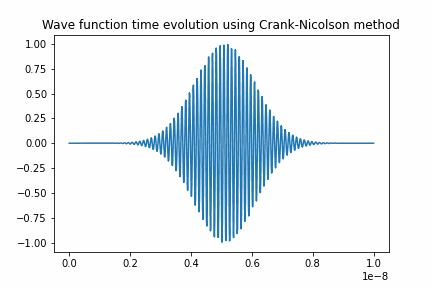

In [10]:
anim.save('psi_crank.gif', writer='pillow')
gifs = display.Image('psi_crank.gif')
display.display(gifs)

The wave function oscillates inside the box, moving from one boundary to the other. When it reaches the boundaries, the wave reflects with destructive and constructive interference for each time and space step. 

This means that repeated observations of the position of the electron will show that the electron oscillates inside the box with some fixed angular frequency $\omega$. The expectation value of the position is time-dependent but sinusoidal.

### PROBLEM 2 (50 pts.; 50/50 for code & discussion)

**The Schrodinger equation and the spectral method**

_Refer to Exercise 9.9 in the Newman text._ In this problem, you will use the spectral method to solve the time-dependent Schodinger equation for the same system as in Problem 1, a single particle in one dimension in a box of length $L$ with impenetrable walls. 

To perform the fast transforms needed for this problem, you can use the scipy $\tt fftpack$ package's discrete sine transform $\tt dst$ ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.dst.html)) and inverse discrete sine transform $\tt idst$ ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.idst.html)). Alternatively, you can use the corresponding functions in the $\tt dcst$ package in Appendix E of the Newman text. 

1. Calculate the values of the coefficients $b_k$ which for convenience can be broken down into their real and imaginary parts as $b_k = \alpha_k + i \eta_k$· Divide the box into $N = 1000$ slices and create two arrays containing the real and imaginary parts of $\psi(x_n,0)$ at each grid point. Perform discrete sine transforms on each array separately and hence calculate the values of the $\alpha_k$ and $\eta_k$ for all $k=1$...$N-1$. *(15 pts.)*

2. Putting $b_k = \alpha_k +i \eta_k$ in the solution above and taking the real part we get $ {\rm Re}\ \psi(x_n, t) $ equals
$$\frac{1}{N} \sum_{k=1}^{N-1} \left[\alpha_k \cos\left(\frac{\pi^2\hbar k^2}{2ML^2}t\right) - \eta_k \sin\left(\frac{\pi^2\hbar k^2}{2ML^2}t\right)\right]\sin\left(\frac{\pi kn}{N}\right)$$
for the real part of the wavefunction. This is an inverse sine transform with coefficients equal to the quantities in the square brackets. 

   Calculate the real part of the wavefunction $\psi(x,t)$ at an arbitrary time $t$ using this formula and the inverse discrete sine transform function. *(10 pts.)* 
   
3. Test your program by making a graph of the wavefunction at time $t = 10^{-16}$ s. *(10 pts.)*

4. Make an animation of the wavefunction over time, similar to that described in part (4) of Problem 1 above. A suitable time interval for each frame of the animation is about $10^{-18}$ s. Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(15 pts.)*


---

We can use a faster solution for the same problem. The spectral method allows us to calculate the wave function at some arbitrary time `t` without solving the preceeding time steps. Again, we begin by solving the initial wave function with the appropriate boundary conditions.

In [11]:
psi_points = psi_initial(x_points)
psi_points[0], psi_points[-1] = 0.0j, 0.0j

Then, we define a function to calculate the wave function at some time. The function first gets the discrete sine transform for the initial wave function. Then, we solve for the coefficients of the dst of the wave function at the time `t`. Then, performing an inverse discrete sine transform gives the full unnormalized wave function at that time.

In [12]:
def psi_at_t(t):
    re = psi_points.real
    im = psi_points.imag
    re_dst = fft.dst(re)
    im_dst = fft.dst(im)

    k = np.arange(0, n+1, 1)
    cos_term = np.cos(np.pi**2*hbar/(2*m_e*l**2)*k**2*t)
    sin_term = np.sin(np.pi**2*hbar/(2*m_e*l**2)*k**2*t)

    dst_coeffs = re_dst*cos_term - im_dst*sin_term

    psi_next = fft.idst(dst_coeffs)/n
    return psi_next


We can show the time evolution of the wave function by plotting the wave function at every $20h$ seconds. We obtain a similar result to the previous problem with some scaling factor. The method resolved significantly faster than the previous implementation using the Crank-Nicolson method.

In [13]:
fig, ax = plt.subplots()
line, = ax.plot(x_points, psi_points.real)

def init_anim():
    ax.set_ylim(-2, 2)
    ax.set_title('Wave function time evolution using Spectral method')

    return line,

def update_anim(frame):
    psi_next = psi_at_t(frame*20*h)
    line.set_data(x_points, psi_next.real)
    
    return line,

anim = animation.FuncAnimation(fig, update_anim, init_func=init_anim, frames=250, repeat=True)
plt.close()

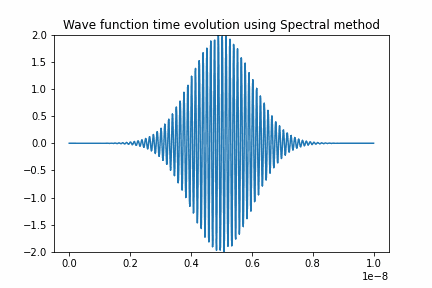

In [14]:
anim.save('psi_spectral.gif', writer='pillow')
gifs = display.Image('test.gif')
display.display(gifs)

Since the solution is similar, the physical explantion is the same as the previous item. There is some scaling since the wave function is unnormalized in both cases.